In [ ]:
pip install wordcloud==1.8.1

In [ ]:
pip install plotly==5.3.1

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import os

# DataViz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Word Tokenizer
from nltk.tokenize import word_tokenize

# Wordcloud
import wordcloud
from wordcloud import WordCloud

# Others
from collections import Counter

# Data

In [ ]:
#name of the albuns
album_name = []

#each album will be appended to a list
zombie_attack = []
chemical_invasion = []
the_morning_after = []
alien = []
the_meaning_of_life = []
stone_cold_sober = []
two_faced = []
the_tankard = []
disco_destroyer = []
kings_of_beer = []
b_day = []
beast_of_bourbon = []
the_beauty_beer = []
thirst = []
volume_14 = []
girl_cerveza = []
rib = []

In [ ]:
# getting each album name and apeeding it to album_name
for album in os.listdir('tankard-lyrics'):
    album_name.append(album)
    
album_name

['17. Rest In Beer (2014).txt',
 '9. Disco Destroyer (1998).txt',
 '14. Thirst (2008).txt',
 '2. Chemical Invasion (1987).txt',
 '6. Stone Cold Sober (1992).txt',
 '1. Zombie Attack (1986).txt',
 '12. Beast Of Bourbon (2004).txt',
 '8. The Tankard (1995).txt',
 '10. Kings Of Beer (2000).txt',
 '16. A Girl Called Cerveza (2012).txt',
 '11. B-Day (2002).txt',
 '4. Alien (1989).txt',
 '5. The Meaning Of Life (1990).txt',
 '3. The Morning After (1988).txt',
 '15. Volume 14 (2010).txt',
 '13. The Beauty And The Beer (2006).txt',
 '7. Two-Faced (1994).txt']

# Albuns Analysis

## Albuns Titles

In [ ]:
album_name_analysis = ' '.join(album_name)
album_name_analysis

'17. Rest In Beer (2014).txt 9. Disco Destroyer (1998).txt 14. Thirst (2008).txt 2. Chemical Invasion (1987).txt 6. Stone Cold Sober (1992).txt 1. Zombie Attack (1986).txt 12. Beast Of Bourbon (2004).txt 8. The Tankard (1995).txt 10. Kings Of Beer (2000).txt 16. A Girl Called Cerveza (2012).txt 11. B-Day (2002).txt 4. Alien (1989).txt 5. The Meaning Of Life (1990).txt 3. The Morning After (1988).txt 15. Volume 14 (2010).txt 13. The Beauty And The Beer (2006).txt 7. Two-Faced (1994).txt'

(-0.5, 999.5, 599.5, -0.5)

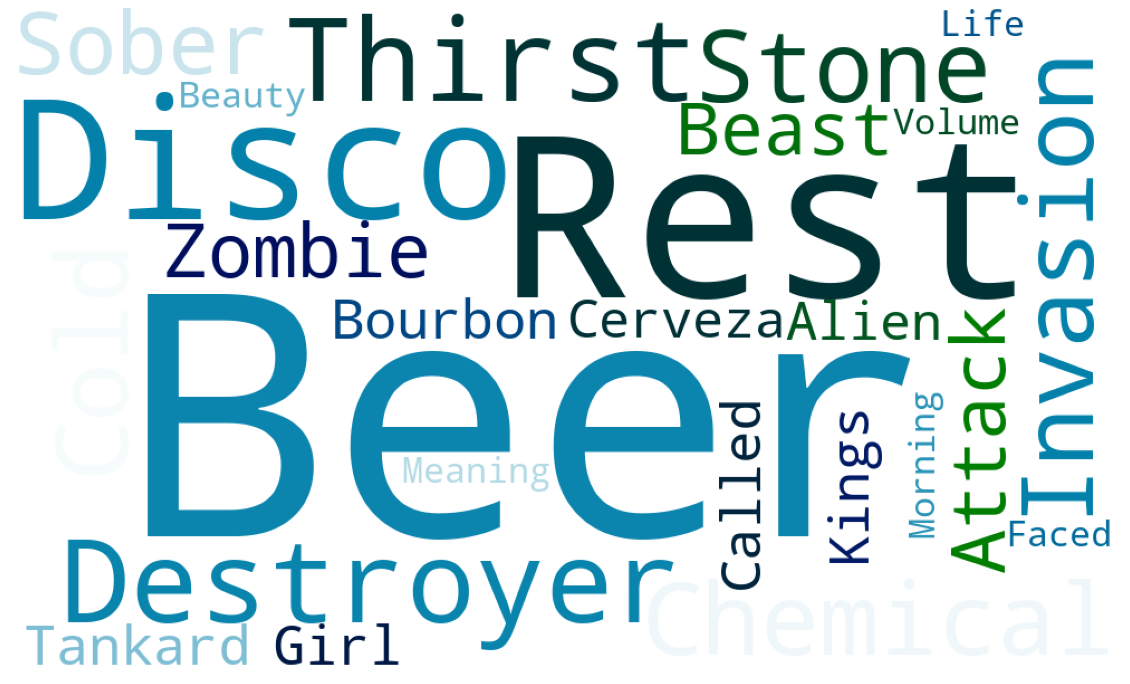

In [ ]:
worldcloud_img = WordCloud(width=1000, height=600, background_color='white', colormap='ocean',min_word_length=4).generate(album_name_analysis)
plt.figure(figsize=(20,20))
plt.imshow(worldcloud_img)
plt.axis('off')

## Organizing Albuns

In [ ]:
def album_to_list(album_name):
    with open('tankard-lyrics/' + album_name) as album:
        full_album = album.readlines()
        album = []
        for lines in full_album:
            lines = lines.lower()
            album.append(lines)
        return album

In [ ]:
rib = album_to_list(album_name[0])
disco_destroyer = album_to_list(album_name[1])
thirst = album_to_list(album_name[2])
chemical_invasion = album_to_list(album_name[3])
stone_cold_sober = album_to_list(album_name[4])
zombie_attack  = album_to_list(album_name[5])
beast_of_bourbon = album_to_list(album_name[6])
the_tankard = album_to_list(album_name[7])
kings_of_beer = album_to_list(album_name[8])
girl_cerveza = album_to_list(album_name[9])
b_day = album_to_list(album_name[10])
alien = album_to_list(album_name[11])
the_meaning_of_life = album_to_list(album_name[12])
the_morning_after = album_to_list(album_name[13])
volume_14 = album_to_list(album_name[14])
the_beauty_beer = album_to_list(album_name[15])
two_faced = album_to_list(album_name[16])

In [ ]:
#list for all albuns
tankard = [zombie_attack, chemical_invasion, the_morning_after, alien, the_meaning_of_life, stone_cold_sober, two_faced,
          the_tankard, disco_destroyer, kings_of_beer, b_day, beast_of_bourbon, the_beauty_beer, thirst, volume_14,
          girl_cerveza, rib]

In [ ]:
number_of_albuns = len(tankard)
number_of_albuns

17

In [ ]:
n_times_beer_albums = album_name_analysis.count('Beer')
n_times_beer_albums

3

## Each Album Analysis

### Def's for album analysis

In [ ]:
def treated_album(album):
  album_treated = []
  for line in album:
    line = re.sub(r'\W+|[0-9]', ' ',line)
    album_treated.append(line)
  album_treated = ''.join(album_treated)
  return album_treated

In [ ]:
def dataframe_frequences(album):
  result = dict(Counter(album.split()))
  df = pd.DataFrame.from_dict(result, orient='index')
  df = df.rename(columns={0:'freq'})
  df = df.sort_values('freq', ascending=False)
  df = df.reset_index()
  mask = (df['index'].str.len() >= 4)
  df = df.loc[mask]
  return df

In [ ]:
def album_wordcloud(album):
  worldcloud_img = WordCloud(width=1000, height=600, background_color='white', colormap='ocean', min_word_length=4).generate(album)
  plt.figure(figsize=(20,20))
  plt.imshow(worldcloud_img)
  plt.axis('off')
  return worldcloud_img

In [ ]:
def treemap_plot(df, number_of_words, title):
  fig = px.treemap(df[:number_of_words], 
                  path=[px.Constant("all"), 'index'], 
                  values='freq', title=title,
                  width=1000, height=700)

  fig.update_traces(root_color="white")
  fig.update_traces(textposition='middle center', selector=dict(type='treemap'))

  fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), font_size=20)
  fig.write_html("tree_map_all.html")
  return fig

## Organizing Albuns

In [ ]:
# organizing each album in its respective variable

tr_kings_of_beer = treated_album(kings_of_beer)
tr_zombie_attack = treated_album(zombie_attack)
tr_chemical_invasion = treated_album(chemical_invasion)
tr_the_morning_after = treated_album(the_morning_after)
tr_alien = treated_album(alien)
tr_the_meaning_of_life = treated_album(the_meaning_of_life)
tr_stone_cold_sober = treated_album(stone_cold_sober)
tr_two_faced = treated_album(two_faced)
tr_the_tankard = treated_album(the_tankard)
tr_disco_destroyer = treated_album(disco_destroyer)
tr_b_day = treated_album(b_day)
tr_beast_of_bourbon = treated_album(beast_of_bourbon)
tr_the_beauty_beer = treated_album(the_beauty_beer)
tr_thirst = treated_album(thirst)
tr_volume_14 = treated_album(volume_14)
tr_girl_cerveza = treated_album(girl_cerveza)
tr_rib = treated_album(rib)

all_treated = [tr_kings_of_beer,tr_zombie_attack, tr_chemical_invasion, tr_the_morning_after, tr_alien, tr_the_meaning_of_life, tr_stone_cold_sober, tr_two_faced,
tr_the_tankard, tr_disco_destroyer, tr_b_day, tr_beast_of_bourbon, tr_the_beauty_beer, tr_thirst, tr_volume_14,tr_girl_cerveza, tr_rib]

In [ ]:
# creating a dataframe of each album

df_kings_of_beer = dataframe_frequences(kings_of_beer)
df_zombie_attack = dataframe_frequences(zombie_attack)
df_chemical_invasion = dataframe_frequences(chemical_invasion)
df_the_morning_after = dataframe_frequences(the_morning_after)
df_alien = dataframe_frequences(alien)
df_the_meaning_of_life = dataframe_frequences(the_meaning_of_life)
df_stone_cold_sober = dataframe_frequences(stone_cold_sober)
df_two_faced = dataframe_frequences(two_faced)
df_the_tankard = dataframe_frequences(the_tankard)
df_disco_destroyer = dataframe_frequences(disco_destroyer)
df_b_day = dataframe_frequences(b_day)
df_beast_of_bourbon = dataframe_frequences(beast_of_bourbon)
df_the_beauty_beer = dataframe_frequences(the_beauty_beer)
df_thirst = dataframe_frequences(thirst)
df_volume_14 = dataframe_frequences(volume_14)
df_girl_cerveza = dataframe_frequences(girl_cerveza)
df_rib = dataframe_frequences(rib)

all_df = [df_kings_of_beer,df_zombie_attack,df_chemical_invasion,df_the_morning_after,df_alien,df_the_meaning_of_life,df_stone_cold_sober,df_two_faced,df_the_tankard,
df_disco_destroyer,df_b_day,df_beast_of_bourbon,df_the_beauty_beer,df_thirst,df_volume_14,df_girl_cerveza,df_rib]

In [ ]:
# creating a wordcloud of each album

wc_kings_of_beer = album_wordcloud(kings_of_beer)
wc_zombie_attack = album_wordcloud(zombie_attack)
wc_chemical_invasion = album_wordcloud(chemical_invasion)
wc_the_morning_after = album_wordcloud(the_morning_after)
wc_alien = album_wordcloud(alien)
wc_the_meaning_of_life = album_wordcloud(the_meaning_of_life)
wc_stone_cold_sober = album_wordcloud(stone_cold_sober)
wc_two_faced = album_wordcloud(two_faced)
wc_the_tankard = album_wordcloud(the_tankard)
wc_disco_destroyer = album_wordcloud(disco_destroyer)
wc_b_day = album_wordcloud(b_day)
wc_beast_of_bourbon = album_wordcloud(beast_of_bourbon)
wc_the_beauty_beer = album_wordcloud(the_beauty_beer)
wc_thirst = album_wordcloud(thirst)
wc_volume_14 = album_wordcloud(volume_14)
wc_girl_cerveza = album_wordcloud(girl_cerveza)
wc_rib = album_wordcloud(rib)

all_wc =[wc_kings_of_beer,wc_zombie_attack,wc_chemical_invasion,wc_the_morning_after,wc_alien,wc_the_meaning_of_life,wc_stone_cold_sober,wc_two_faced,wc_the_tankard,
wc_disco_destroyer,wc_b_day,wc_beast_of_bourbon,wc_the_beauty_beer,wc_thirst,wc_volume_14,wc_girl_cerveza,wc_rib]

In [ ]:
# creating a treemap of each data frame album

tm_kings_of_beer = treemap_plot(df_kings_of_beer, 40, 'Kings of Beer')
tm_zombie_attack = treemap_plot(df_zombie_attack, 40, 'Zombie Attack')
tm_chemical_invasion = treemap_plot(df_chemical_invasion, 40, 'Chemical Invasion')
tm_the_morning_after = treemap_plot(df_the_morning_after, 40, 'The Morning After')
tm_alien  = treemap_plot(df_alien, 40, 'Alien')
tm_the_meaning_of_life  = treemap_plot(df_the_meaning_of_life, 40, 'The Meaning of Life')
tm_stone_cold_sober  = treemap_plot(df_stone_cold_sober, 40, 'Stone Cold Sober')
tm_two_faced  = treemap_plot(df_two_faced, 40, 'Two Faced')
tm_the_tankard  = treemap_plot(df_the_tankard, 40, 'The Tankard')
tm_disco_destroyer  = treemap_plot(df_disco_destroyer, 40, 'Disco Distroyer')
tm_b_day  = treemap_plot(df_b_day, 40, 'B-day')
tm_beast_of_bourbon  = treemap_plot(df_beast_of_bourbon, 40, 'The Beast of Bourbon')
tm_the_beauty_beer = treemap_plot(df_the_beauty_beer, 40, 'The Beauty and the Beer')
tm_thirst  = treemap_plot(df_thirst, 40, 'Thirst')
tm_volume_14 = treemap_plot(df_volume_14, 40, 'Volume 14')
tm_girl_cerveza  = treemap_plot(df_girl_cerveza, 40, 'A Girl Called Cerveza')
tm_rib = treemap_plot(df_rib, 40, 'Rest in Beer')

all_tm = [tm_kings_of_beer,tm_zombie_attack,tm_chemical_invasion,tm_the_morning_after,tm_alien,tm_the_meaning_of_life,tm_stone_cold_sober,tm_two_faced,tm_the_tankard,
tm_disco_destroyer,tm_b_day,tm_beast_of_bourbon,tm_the_beauty_beer,tm_thirst,tm_volume_14,tm_girl_cerveza,tm_rib]

In [116]:
## SAVE ALL FILES

In [ ]:
#wc
for  in 
  wc_kings_of_beer.to_file('NAME.png')

#csv

#tm


# All Musics Analysis

In [ ]:
all = []

for album in tankard:
    for line in album:
        line = re.sub(r'\W+|[0-9]', ' ',line)
        all.append(line)

all

In [ ]:
all_words = ' '.join(all)
all_words

In [ ]:
worldcloud_img = WordCloud(min_word_length=4, width=1000, height=600,
                          background_color='white', colormap='ocean').generate(all_words)
plt.figure(figsize=(20,20))
plt.imshow(worldcloud_img)
plt.axis('off')
plt.show()

In [ ]:
tankard_frequences = df_freq(all_words)

In [ ]:
treemap_plot(tankard_frequences, 40, 'Title')